# Part IV Lab 1 Solution

Written by Charlie Watson (dch.watson@gmail.com) for University of Victoria MATH/PHYS 248 Winter 2018.

## Relevant Notes

The task is to create an animated analogue clock. The necessary material is covered in [Part IV Lecture 1](../Part.IV/Dynamic.plots.1.ipynb). In particular, I can start with [Ryan's code to animate a pendulum](../Part.IV/Dynamic.plots.1.ipynb#Pendulum-plots), since it involves drawing a circle and animating a radial line. 

## Outline

I will start by animating only the second hand, so I can see it working. After that's working it will be easy to add the hour and minute hands. Finally, I will make the clock look nice.

After the first code cell with all of the necessary imports, *every code cell is completely self-contained*. That makes this notebook quite long, but even though I change my code incrementally, nothing is obscured along the way. Think of this notebook as capturing my progress at every step while I write the code in front of you.

## Table of Contents

* [Setting Up](#Setting-Up)
* [Stripping Down Ryan's Code](#Stripping-Down-Ryan's-Code)
* [Getting the Current Time](#Getting-the-Current-Time)
* [Adding Hour and Minute Hands](#Adding-Hour-and-Minute-Hands)
* [Making It Look Nicer](#Making-It-Look-Nicer)
* [Improving the Hour and Minute Hands](#Improving-the-Hour-and-Minute-Hands)

## Setting Up

As always, I begin by importing the modules wI'll need.

* Ryan has instructed us to use the `time` module to get the current time.
* As in the lecture, I will use `matplotlib.animation` to create an animation.
* The magic commands `%pylab nbagg` or `%matplotlib nbagg` are required to embed animations in the notebook. I will use `%matplotlib` to avoid polluting the global namespace.

Note: If you're having trouble with embedded animations (such as running out of memory), try using just `%matplotlib` instead. Animations will open in a new window.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
%matplotlib nbagg

## Stripping Down Ryan's Code

I'll look at Ryan's code in chunks and figure out which parts I should keep.

```python
## let's now do an animated plot, to "see" the pendulum in action

fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle( (0.0, 0.0), 1.0, color='y', fill=False)
cent = plt.plot([0.0], [0.0], 'ro')
ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
```

I'll keep the circle as the outside of the clock. I don't need to mark the centre, so I'll remove it. The x and y limits are still sensible. So, my code will start like

<IPython.core.display.Javascript object>


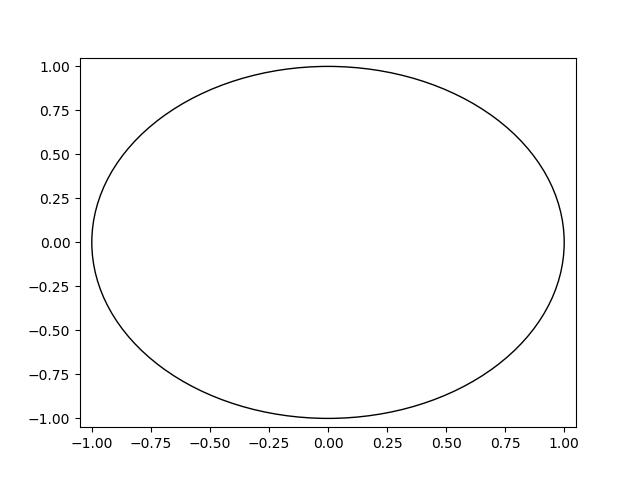

In [2]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

plt.show()

Ryan then sets up the arm of the pendulum.

```python
## set up arm
TH = [0.0]
TP = [14.0]

arm, = plt.plot([0.0, np.sin(TH[-1])], [0.0, -np.cos(TH[-1])], 'b')

dt = 0.002
```

`TH` and `TP` are lists of the all previous $\theta$ and $\theta'$ values. They are necessary for solving the ODE and tracing the previous path of the pendulum, so I don't need them here. Similarly, I don't need `dt`.

Notice the comma after `arm`! `plt.plot` returns a *list* of plots (even if we only ask for one), and I only want the first one! The other way to handle this is to get the element at index `0`, like

```python
arm = plt.plot([0.0, np.sin(TH[-1])], [0.0, -np.cos(TH[-1])], 'b')[0]
```

All I need is a plot object for the hour hand that I can update each frame. I'll name that `hour_hand`. The initial state of the arm doesn't matter, because my `init` function will set it up properly before the first frame of the animation.

<IPython.core.display.Javascript object>


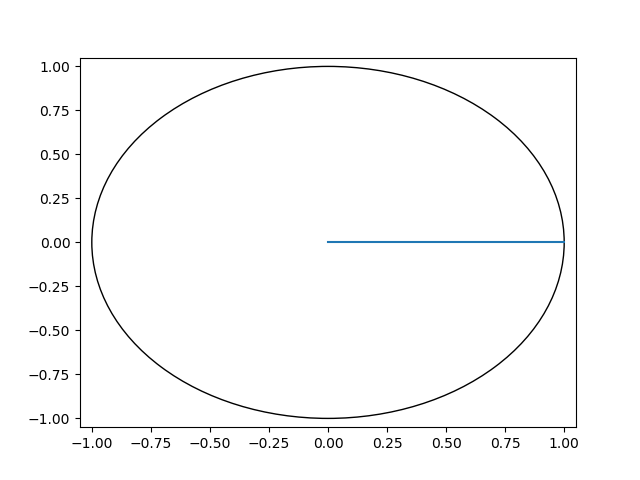

In [3]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create hour hand
second_hand = plt.plot([0, 1], [0, 0])[0]

plt.show()

The next part of Ryan's code is a function that sets up the animation.

```python
def init():
    arm.set_xdata( [0.0, np.sin(TH[-1])] )
    arm.set_ydata( [0.0, -np.cos(TH[-1])] )
    return arm, 
```

Notice the comma in the `return` statement! The `init` and `animate` functions *must* return lists of objects! The other way to do this is to wrap the value in brackets, like

```python
return [arm]
```

Eventually I'll add some code to set the hands to the current time, but for now I'll just set the hour hand to the x-axis.

<IPython.core.display.Javascript object>


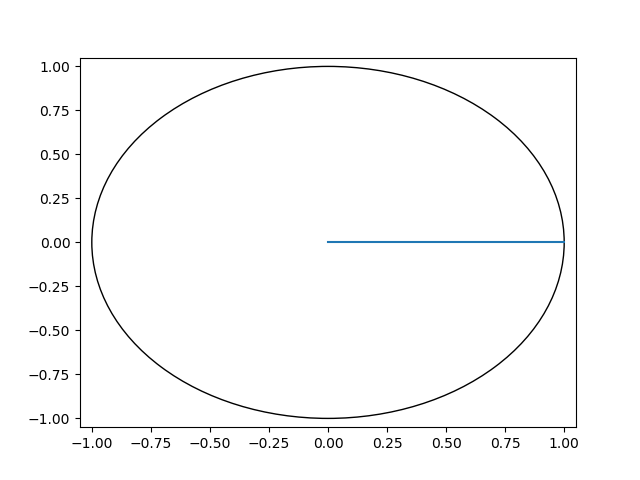

In [4]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create second hand
second_hand = plt.plot([0, 1], [0, 0])[0]

def init():
    second_hand.set_xdata([0, 1])
    second_hand.set_ydata([0, 0])
    
    return [second_hand]

plt.show()

Ryan then defines a function which updates the figure for each frame of the animation.

```python
def animate(i):
    ## asking the ODE code to do just one step
    SOL = odeint(lambda th, t, a, b: [th[1], -a*th[1]-b*np.sin(th[0])], [TH[-1], TP[-1]], \
                [0.0, dt], args=(a,b))
    TH.append(SOL[-1][0])
    TP.append(SOL[-1][1])
    arm.set_xdata( [0.0, np.sin(TH[-1])] )
    arm.set_ydata( [0.0, -np.cos(TH[-1])] )
    return arm,
```

I don't need most of this, since I'm not solving an ODE. All I need to do is update the hour hand.

Notice that the animate function *must* to take an argument specifying the frame number. In my final code I won't use the frame number, but I'm not going to use the proper time, yet. For now I'll simply make the clock advance by one degree per frame.

<IPython.core.display.Javascript object>


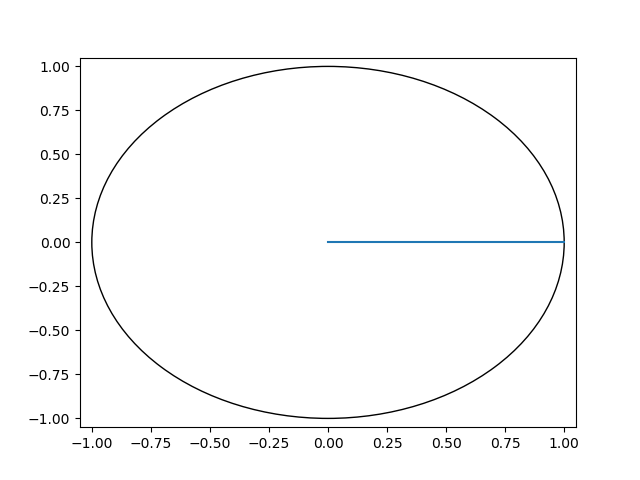

In [5]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create second hand
second_hand = plt.plot([0, 1], [0, 0])[0]

def init():
    second_hand.set_xdata([0, 1])
    second_hand.set_ydata([0, 0])
    
    return [second_hand]

def animate(i):
    # Map frame i to i degrees around the circle.
    angle = 2*np.pi * i/360
    
    second_hand.set_xdata([0, np.cos(angle)])
    second_hand.set_ydata([0, np.sin(angle)])
    
    return [second_hand]

plt.show()

Finally, Ryan bundles this all together and creates the animation.

```python    
## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=1,\
                               blit=True )

plt.show()
```

The `interval` argument specifies the delay between frames of the animation, in milliseconds. I don't need clock to update one thousand times per second, so I'll use `interval=200` instead. This is actually the default, so I could simply leave the argument out if I wanted.

The `blit` argument is important. By default, matplotlib will create the animation by separately rendering each frame, even if very little changes between frames. For simple animations (like this one) this might not be a big problem, but for larger, or more detailed, animations this can take a *long* time. Alternatively, if a class of students are all repeatedly rendering simple animations at the same time, it could crash the server. Blitting is a rendering method where only the parts of the image which change are calculated, often decreasing rendering time *enormously*.

<IPython.core.display.Javascript object>


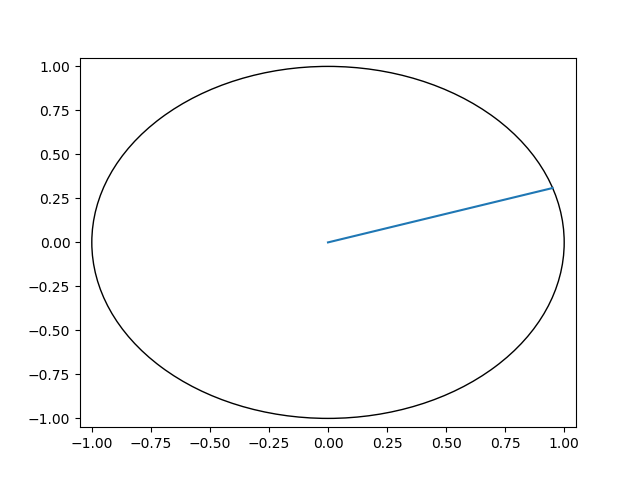

In [6]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create second hand
second_hand = plt.plot([0, 1], [0, 0])[0]

def init():
    second_hand.set_xdata([0, 1])
    second_hand.set_ydata([0, 0])
    
    return [second_hand]

def animate(i):
    # Map frame i to i degrees around the circle.
    angle = 2*np.pi * i/360
    
    second_hand.set_xdata([0, np.cos(angle)])
    second_hand.set_ydata([0, np.sin(angle)])
    
    return [second_hand]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

Excellent! First I will make the animation use the proper time, then I will make the clock look nicer.

## Getting the Current Time

The `time` module provides the `localtime()` function which returns a dictionary containing everything about the current time you could want. However, all four servers are set to UTC (Universal Coordinated Time, identical to Greenwich Mean Time) instead of the Pacific Standard Time you might expect. We'll have to account for that eventually.

In [11]:
time.tzname

('PST', 'PDT')

In [7]:
now = time.localtime()
now

time.struct_time(tm_year=2018, tm_mon=3, tm_mday=22, tm_hour=22, tm_min=1, tm_sec=11, tm_wday=3, tm_yday=81, tm_isdst=1)

To get the hour or minute, use the appropriate name.

In [8]:
now.tm_hour, now.tm_min

(22, 1)

Now I have to map a second to an angle on the circle. Notice that second each hour maps to one-sixtieth of a rotation clockwise from vertical ($\frac{\pi}{2}$ radians). Clockwise is a negative rotation, so second 1 maps to $\frac{\pi}{2} - 1 \cdot \frac{2\pi}{60}$. In general, second $s$ maps to $\frac{\pi}{2} - s \cdot \frac{2\pi}{60}$.

My `init` and `animate` functions will now simply get the current time and set the second hand to the right angle.

<IPython.core.display.Javascript object>


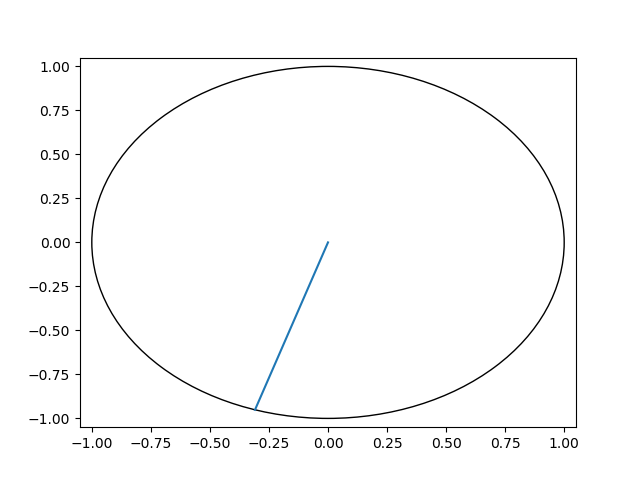

In [9]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create second hand
second_hand = plt.plot([0, 1], [0, 0])[0]

def init():
    # Get the current time and set the hand angles.
    now = time.localtime()
    second_angle = np.pi/2 - now.tm_sec * (2*np.pi / 60)
    
    second_hand.set_xdata([0, np.cos(second_angle)])
    second_hand.set_ydata([0, np.sin(second_angle)])
    
    return [second_hand]

def animate(i):
    # Get the current time and set the hand angles.
    now = time.localtime()
    second_angle = np.pi/2 - now.tm_sec * (2*np.pi / 60)
    
    second_hand.set_xdata([0, np.cos(second_angle)])
    second_hand.set_ydata([0, np.sin(second_angle)])
    
    return [second_hand]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

Beautiful! I'm almost ready to make the clock look a bit nicer. However, before that I can clean up my code a bit. I've repeated myself in the bodies of `init` and `animate`. I can refactor that code into a function like `hand_angles(h, m, s)` which returns a tuple like `(h_angle, m_angle, s_angle)`.

<IPython.core.display.Javascript object>


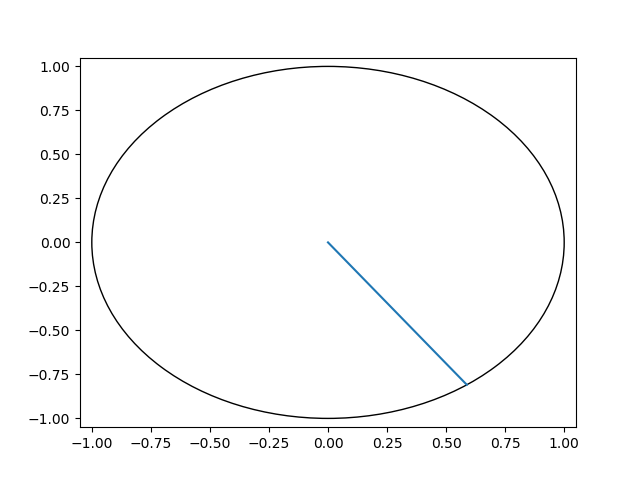

In [16]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create second hand
second_hand = plt.plot([0, 1], [0, 0])[0]

# Update the second for the current time.
def update_hand():
    now = time.localtime()
    
    second_angle = np.pi/2 - now.tm_sec * (2*np.pi / 60)
    second_hand.set_xdata([0, np.cos(second_angle)])
    second_hand.set_ydata([0, np.sin(second_angle)])
    
    return [second_hand]

def init():
    return [update_hand()]

def animate(i):
    return [update_hand()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

## Adding Hour and Minute Hands

Adding the minute and hour hands is mostly copy-and-paste. I'll also change the name of `update_hand()` to `update_hands()`.

<IPython.core.display.Javascript object>


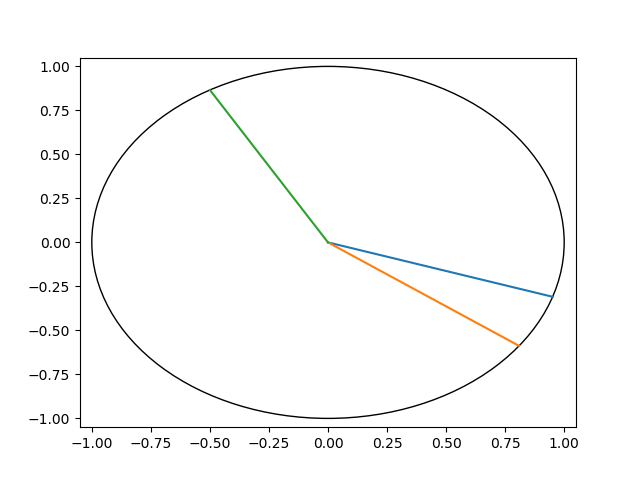

In [28]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create clock hands
second_hand = plt.plot([0, 1], [0, 0])[0]
minute_hand = plt.plot([0, 1], [0, 0])[0]
hour_hand = plt.plot([0, 1], [0, 0])[0]

# Update all three hands for the current time.
def update_hands():
    now = time.localtime()
    
    second_angle = np.pi/2 - now.tm_sec * (2*np.pi / 60)
    second_hand.set_xdata([0, np.cos(second_angle)])
    second_hand.set_ydata([0, np.sin(second_angle)])
    
    minute_angle = np.pi/2 - now.tm_min * (2*np.pi / 60)
    minute_hand.set_xdata([0, np.cos(minute_angle)])
    minute_hand.set_ydata([0, np.sin(minute_angle)])
    
    hour_angle = np.pi/2 - now.tm_hour * (2*np.pi / 12)
    hour_hand.set_xdata([0, np.cos(hour_angle)])
    hour_hand.set_ydata([0, np.sin(hour_angle)])
    
    return [second_hand, minute_hand, hour_hand]

def init():
    return [update_hands()]

def animate(i):
    return [update_hands()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

This is starting to look pretty good, but I'm repeating myself in my code again. I'll refactor `update_hands()` and create a function `update_hand(hand, value, steps)` which takes one of the hand plot objects, the relevant time value, and the number of steps around for that time value.

<IPython.core.display.Javascript object>


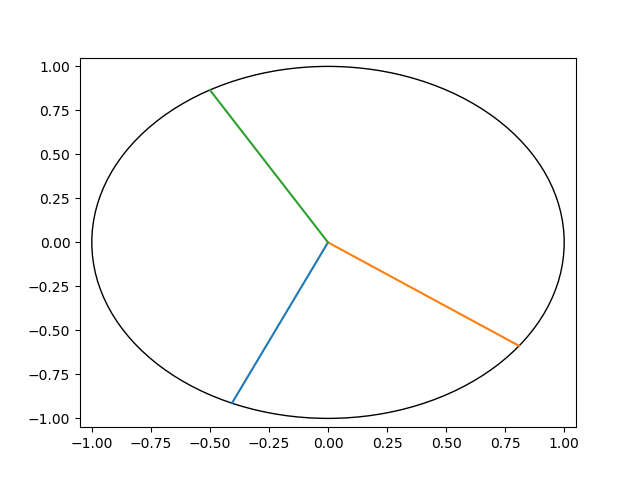

In [29]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create clock hands
second_hand = plt.plot([0, 1], [0, 0])[0]
minute_hand = plt.plot([0, 1], [0, 0])[0]
hour_hand = plt.plot([0, 1], [0, 0])[0]

# Update one hand to a given value.
def update_hand(hand, value, steps):
    angle = np.pi/2 - value * (2*np.pi / steps)
    
    hand.set_xdata([0, np.cos(angle)])
    hand.set_ydata([0, np.sin(angle)])

# Update all three hands for the current time.
def update_hands():
    now = time.localtime()
    
    update_hand(second_hand, now.tm_sec, 60)
    update_hand(minute_hand, now.tm_min, 60)
    update_hand(hour_hand, now.tm_hour, 12)
    
    return [second_hand, minute_hand, hour_hand]

def init():
    return [update_hands()]

def animate(i):
    return [update_hands()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

## Making It Look Nicer

Firstly I can correct the aspect ratio so the clock is a circle, and remove the axis ticks.

<IPython.core.display.Javascript object>


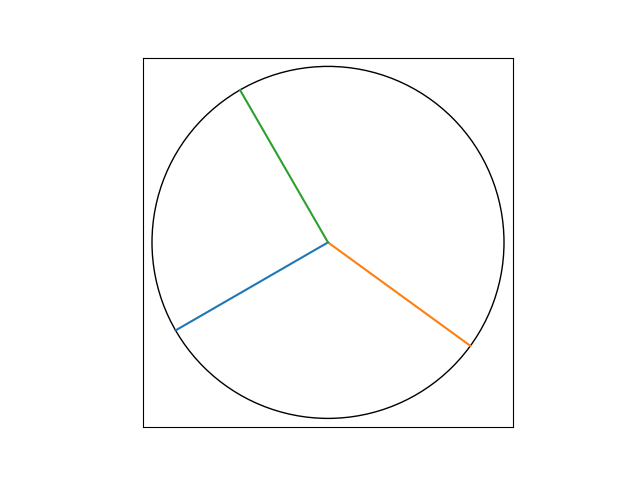

In [30]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create clock hands
second_hand = plt.plot([0, 1], [0, 0])[0]
minute_hand = plt.plot([0, 1], [0, 0])[0]
hour_hand = plt.plot([0, 1], [0, 0])[0]

# Update one hand to a given value.
def update_hand(hand, value, steps):
    angle = np.pi/2 - value * (2*np.pi / steps)
    
    hand.set_xdata([0, np.cos(angle)])
    hand.set_ydata([0, np.sin(angle)])

# Update all three hands for the current time.
def update_hands():
    now = time.localtime()
    
    update_hand(second_hand, now.tm_sec, 60)
    update_hand(minute_hand, now.tm_min, 60)
    update_hand(hour_hand, now.tm_hour, 12)
    
    return [second_hand, minute_hand, hour_hand]

def init():
    return [update_hands()]

def animate(i):
    return [update_hands()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

Next I can make the hands look different. The second hand on a clock is long and thin. The minute hand is medium-length and thick. The hour hand is short and thick. I will define three new variables for the hand lengths. I will also have to modify `update_hand` to take a hand length. I'll also change the hand colours as Ryan asked.

<IPython.core.display.Javascript object>


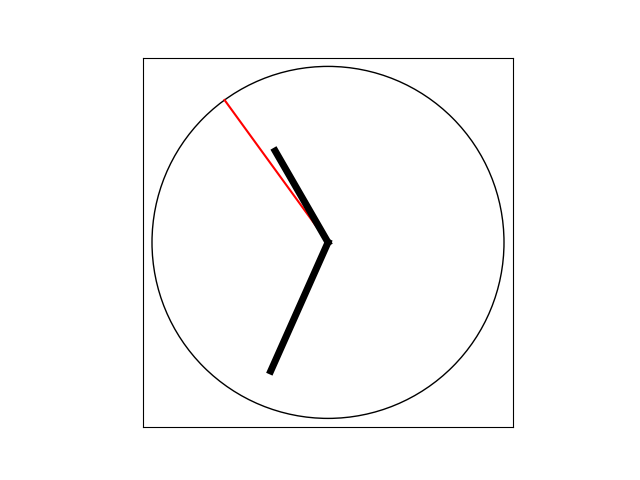

In [45]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Create clock hands
second_length = 1
minute_length = 0.8
hour_length = 0.6

second_hand = plt.plot([0, 1], [0, 0], color='red')[0]
minute_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]
hour_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]

# Update one hand to a given value.
def update_hand(hand, value, steps, length):
    angle = np.pi/2 - value * (2*np.pi / steps)
    
    hand.set_xdata([0, length * np.cos(angle)])
    hand.set_ydata([0, length * np.sin(angle)])

# Update all three hands for the current time.
def update_hands():
    now = time.localtime()
    
    update_hand(second_hand, now.tm_sec, 60, second_length)
    update_hand(minute_hand, now.tm_min, 60, minute_length)
    update_hand(hour_hand, now.tm_hour, 12, hour_length)
    
    return [second_hand, minute_hand, hour_hand]

def init():
    return [update_hands()]

def animate(i):
    return [update_hands()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

Finally, I can add numbers around the face.

<IPython.core.display.Javascript object>


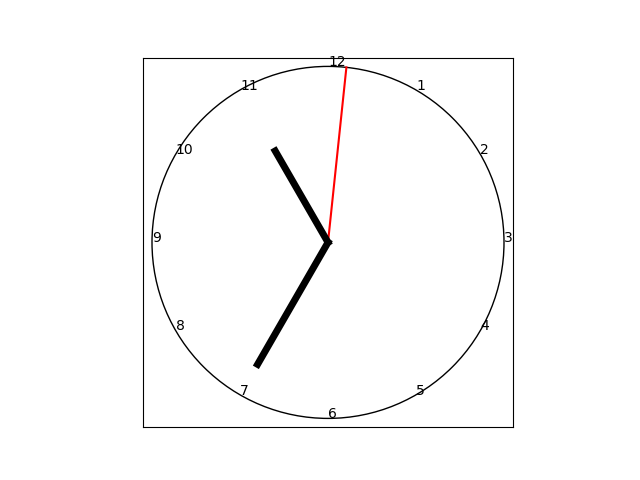

In [46]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Add numbers around the clock
for i in range(1, 13):
    angle = np.pi/2 - i * (2*np.pi / 12)
    plt.text(np.cos(angle), np.sin(angle), i)

# Create clock hands
second_length = 1
minute_length = 0.8
hour_length = 0.6

second_hand = plt.plot([0, 1], [0, 0], color='red')[0]
minute_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]
hour_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]

# Update one hand to a given value.
def update_hand(hand, value, steps, length):
    angle = np.pi/2 - value * (2*np.pi / steps)
    
    hand.set_xdata([0, length * np.cos(angle)])
    hand.set_ydata([0, length * np.sin(angle)])

# Update all three hands for the current time.
def update_hands():
    now = time.localtime()
    
    update_hand(second_hand, now.tm_sec, 60, second_length)
    update_hand(minute_hand, now.tm_min, 60, minute_length)
    update_hand(hour_hand, now.tm_hour, 12, hour_length)
    
    return [second_hand, minute_hand, hour_hand]

def init():
    return [update_hands()]

def animate(i):
    return [update_hands()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

That's pretty good, but I can clearly improve it. I'll centre the numbers and move them inside the circle.

<IPython.core.display.Javascript object>


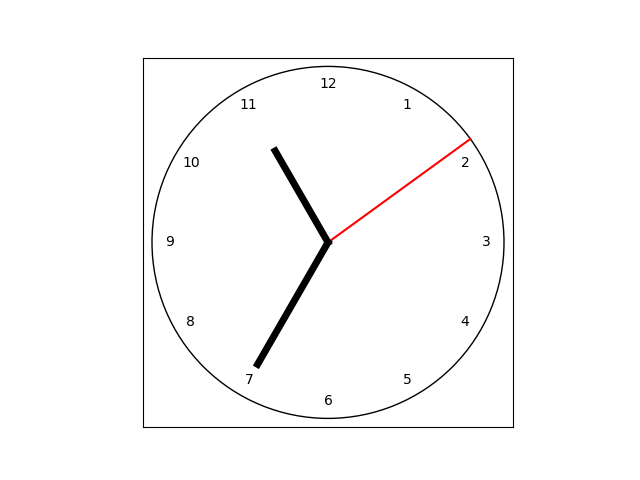

In [47]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Add numbers around the clock
for i in range(1, 13):
    angle = np.pi/2 - i * (2*np.pi / 12)
    plt.text(0.9 * np.cos(angle), 0.9 * np.sin(angle), i,
             horizontalalignment='center', verticalalignment='center')

# Create clock hands
second_length = 1
minute_length = 0.8
hour_length = 0.6

second_hand = plt.plot([0, 1], [0, 0], color='red')[0]
minute_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]
hour_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]

# Update one hand to a given value.
def update_hand(hand, value, steps, length):
    angle = np.pi/2 - value * (2*np.pi / steps)
    
    hand.set_xdata([0, length * np.cos(angle)])
    hand.set_ydata([0, length * np.sin(angle)])

# Update all three hands for the current time.
def update_hands():
    now = time.localtime()
    
    update_hand(second_hand, now.tm_sec, 60, second_length)
    update_hand(minute_hand, now.tm_min, 60, minute_length)
    update_hand(hour_hand, now.tm_hour, 12, hour_length)
    
    return [second_hand, minute_hand, hour_hand]

def init():
    return [update_hands()]

def animate(i):
    return [update_hands()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

## Improving the Hour and Minute Hands

A real clock's hour hand doesn't make a big jump every hour. Instead, it moves gradually every moment. I can change the way I calculate the hour to include the portion of the way through the current hour.

<IPython.core.display.Javascript object>


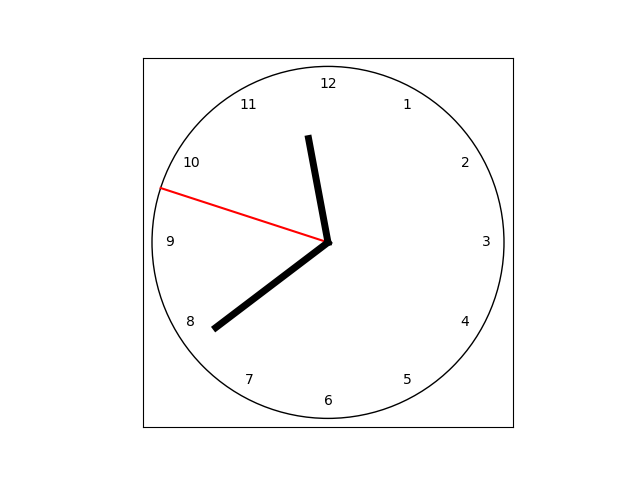

In [51]:
plt.close()

fig, ax = plt.subplots()

# Configure axes
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Create clock boundary
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

# Add numbers around the clock
for i in range(1, 13):
    angle = np.pi/2 - i * (2*np.pi / 12)
    plt.text(0.9 * np.cos(angle), 0.9 * np.sin(angle), i,
             horizontalalignment='center', verticalalignment='center')

# Create clock hands
second_length = 1
minute_length = 0.8
hour_length = 0.6

second_hand = plt.plot([0, 1], [0, 0], color='red')[0]
minute_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]
hour_hand = plt.plot([0, 1], [0, 0], color='black', linewidth=5)[0]

# Update one hand to a given value.
def update_hand(hand, value, steps, length):
    angle = np.pi/2 - value * (2*np.pi / steps)
    
    hand.set_xdata([0, length * np.cos(angle)])
    hand.set_ydata([0, length * np.sin(angle)])

# Update all three hands for the current time.
def update_hands():
    now = time.localtime()
    
    # Compute time values including fractions.
    hour = now.tm_hour + now.tm_min/60 + now.tm_sec/3600
    minute = now.tm_min + now.tm_sec/60
    
    update_hand(second_hand, now.tm_sec, 60, second_length)
    update_hand(minute_hand, minute, 60, minute_length)
    update_hand(hour_hand, hour, 12, hour_length)
    
    return [second_hand, minute_hand, hour_hand]

def init():
    return [update_hands()]

def animate(i):
    return [update_hands()]

ani = animation.FuncAnimation(fig, animate, init_func=init, interval=200, blit=True)

plt.show()

That's a nice looking clock.